In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('1-s2.0-S2352340918309600-mmc2.xlsx')
df

,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps,Class_Name
0,3.000,4.200,4.900,12,128.72872,6,1,27.885,3.96400,'Very Low'
1,4.727,5.545,6.364,12,128.72872,6,1,10.935,10.22700,'Very Low'
2,29.727,31.273,31.909,12,128.72872,6,1,27.598,0.06955,'Low'
3,12.200,13.700,14.800,12,128.72872,6,1,27.885,3.96400,'Low'
4,7.528,8.636,9.364,12,128.72872,6,1,24.653,213.72500,'Very Low'
...,...,...,...,...,...,...,...,...,...,...
2445,12.909,7.545,2.636,4,732.95900,4,3,47.510,41.34300,'Very Low'
2446,1.182,1.000,0.091,4,732.95900,4,3,36.793,84.64600,'Very Low'
2447,2.167,0.833,0.083,4,732.95900,4,3,53.364,79.33200,'Very Low'
2448,4.667,4.250,1.417,4,732.95900,4,3,36.793,84.64600,'Very Low'


In [ ]:
# Features (input attributes) and Labels (Class_Name)
features = [
    'Jobs_per_ 1Minute', 'Jobs_per_ 5 Minutes', 'Jobs_per_ 15Minutes',
    'Mem capacity', 'Disk_capacity_GB', 'Num_of_CPU_Cores',
    'CPU_speed_per_Core', 'Avg_Recieve_Kbps', 'Avg_Transmit_Kbps'
]
label = 'Class_Name'

X = df[features]  # Feature matrix
y = df[label]  # Target labels

In [ ]:
# Split the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      'High'       0.00      0.00      0.00         2
       'Low'       0.00      0.00      0.00        31
    'Medium'       0.00      0.00      0.00         5
  'Very Low'       0.94      1.00      0.97       575

    accuracy                           0.94       613
   macro avg       0.23      0.25      0.24       613
weighted avg       0.88      0.94      0.91       613



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


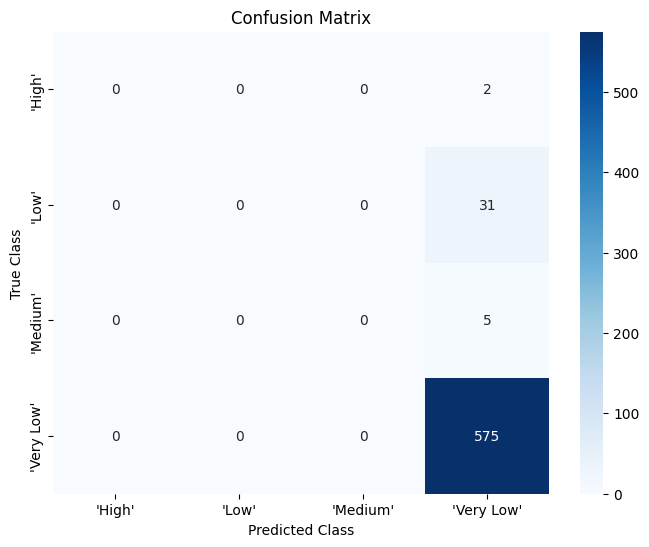

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Compare with Gaussian Naïve Bayes (as mentioned in the paper)
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

In [ ]:
# Evaluate Gaussian Naïve Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naïve Bayes Accuracy: {accuracy_gnb:.2f}")

Gaussian Naïve Bayes Accuracy: 0.60


In [ ]:
# Classification Report for Gaussian Naïve Bayes
print("\nClassification Report (Gaussian Naïve Bayes):")
print(classification_report(y_test, y_pred_gnb))


Classification Report (Gaussian Naïve Bayes):
              precision    recall  f1-score   support

      'High'       0.25      1.00      0.40         2
       'Low'       0.12      1.00      0.21        31
    'Medium'       1.00      0.40      0.57         5
  'Very Low'       1.00      0.58      0.73       575

    accuracy                           0.60       613
   macro avg       0.59      0.75      0.48       613
weighted avg       0.95      0.60      0.71       613



In [ ]:
# Performance Comparison
print("\nPerformance Comparison:")
print(f"SVM Accuracy: {accuracy:.2f}")
print(f"Gaussian Naïve Bayes Accuracy: {accuracy_gnb:.2f}")


Performance Comparison:
SVM Accuracy: 0.94
Gaussian Naïve Bayes Accuracy: 0.60
